In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
lamok = pd.read_csv('dataset\\dengue.csv')

In [3]:
lamok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
lamok.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
lamok['Month'] = lamok['Month'].astype("category")
lamok['Region'] = lamok['Region'].astype("category")

<h1>Insights 1: On what year has the most number of Dengue Cases?</h1>

The year with the highest Dengue Cases is 2019.


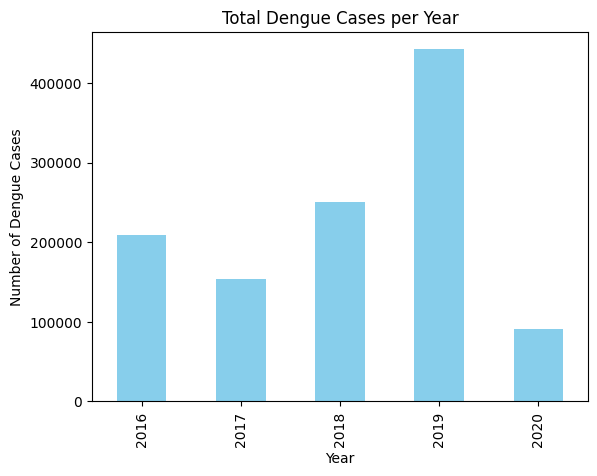

In [6]:
yearly_cases = lamok.groupby('Year')['Dengue_Cases'].sum()
max_year = yearly_cases.idxmax()  
max_cases = yearly_cases[max_year] 
print(f"The year with the highest Dengue Cases is {max_year}.")

yearly_cases.plot(kind='bar', color='skyblue')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Dengue Cases')
plt.show()

<h1> Inisght 2:"How many people contracted dengue in Region V during 2019 and 2020?"</h1>

Total number of dengue cases in Region V during 2019: 11141
Total number of dengue cases in Region V during 2020: 1721


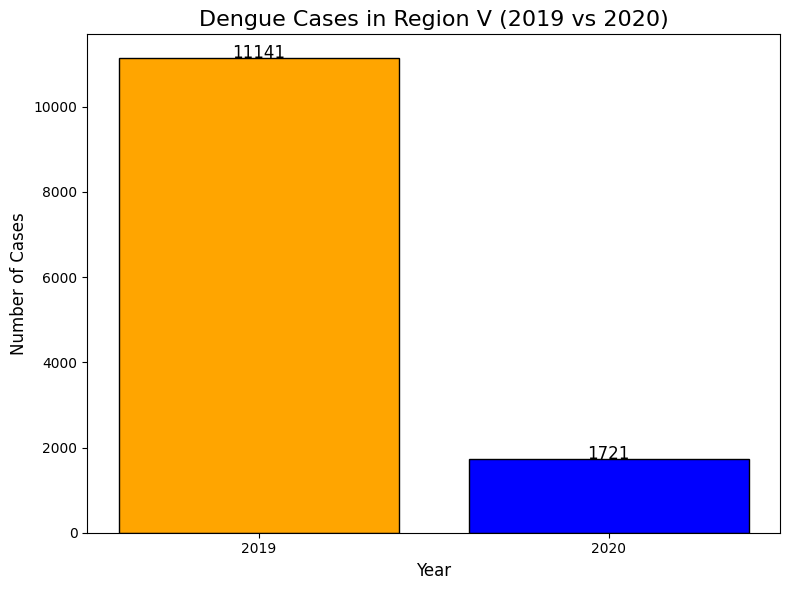

In [7]:
region_v_2019 = lamok[(lamok['Region'] == 'Region V') & (lamok['Year'] == 2019)]
region_v_2020 = lamok[(lamok['Region'] == 'Region V') & (lamok['Year'] == 2020)]

total_cases_region_v_2019 = region_v_2019['Dengue_Cases'].sum()
total_cases_region_v_2020 = region_v_2020['Dengue_Cases'].sum()

print(f"Total number of dengue cases in Region V during 2019: {total_cases_region_v_2019}")
print(f"Total number of dengue cases in Region V during 2020: {total_cases_region_v_2020}")

plt.figure(figsize=(8, 6))  
years = ['2019', '2020']
cases = [total_cases_region_v_2019, total_cases_region_v_2020]
plt.bar(years, cases, color=['orange', 'blue'], edgecolor='black')
plt.title('Dengue Cases in Region V (2019 vs 2020)', fontsize=16)
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Year', fontsize=12)
for index, value in enumerate(cases):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)
plt.tight_layout()
plt.show()

<h1> Inisght 3:Is there a correlation between the number of dengue cases and a specific month?</h1>

In [8]:
lamok['Month'] = lamok['Month'].cat.codes + 1 

Correlation between Month and Dengue Cases is 0.05, which means THERE IS NO SIGNIFICANT CORRELATION.


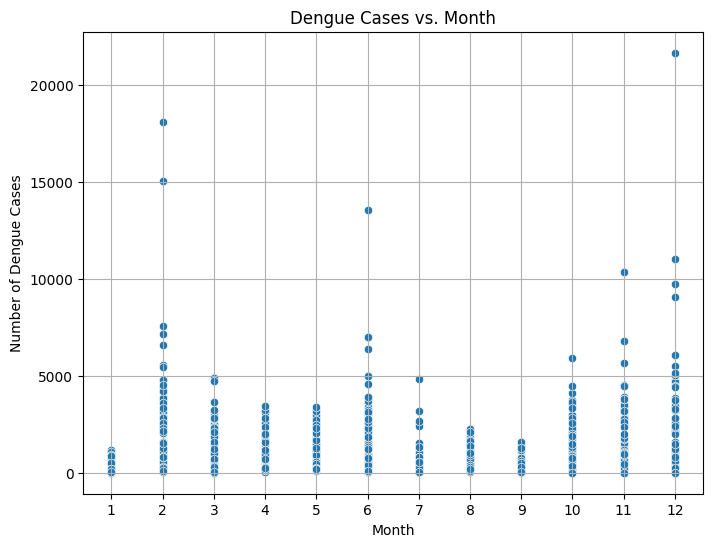

In [9]:
correlation = lamok['Month'].corr(lamok['Dengue_Cases'])
print(f"Correlation between Month and Dengue Cases is {correlation:.2f}, which means THERE IS NO SIGNIFICANT CORRELATION.")


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Month', y='Dengue_Cases', data=lamok)
plt.title('Dengue Cases vs. Month')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.show()


<h1> Insight 4: Is there a correlation between the number of dengue cases and the number of deaths? What does the correlation coefficient suggest about the relationship between these two variables? </h1>

Correlation Coefficient of 0.04 indicates a very weak positive correlation between the number of dengue cases and the number of deaths.


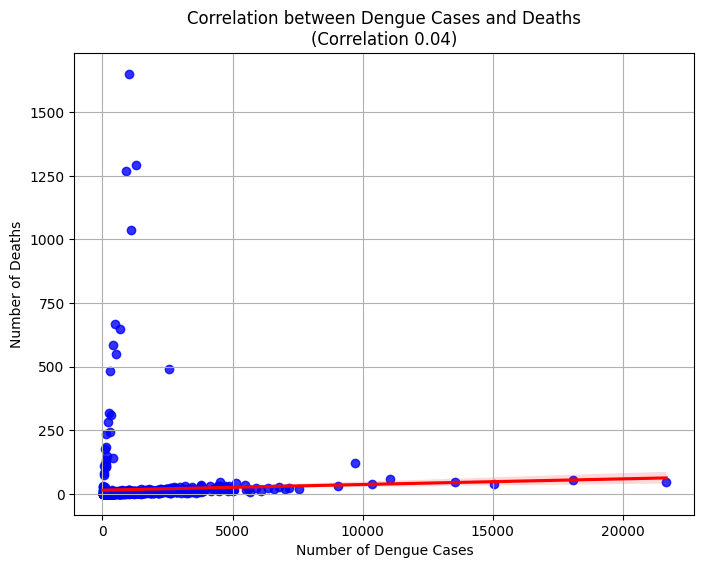

In [10]:
correlation_matrix = lamok[['Dengue_Cases', 'Dengue_Deaths']].corr()
correlation_coefficient = correlation_matrix.loc['Dengue_Cases', 'Dengue_Deaths']

print(f'Correlation Coefficient of {correlation_coefficient:.2f} indicates a very weak positive correlation between the number of dengue cases and the number of deaths.')
plt.figure(figsize=(8, 6))
sns.regplot(x='Dengue_Cases', y='Dengue_Deaths', data=lamok, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Number of Dengue Cases')
plt.ylabel('Number of Deaths')
plt.title(f'Correlation between Dengue Cases and Deaths\n(Correlation {correlation_coefficient:.2f})')
plt.grid(True)
plt.show()

<h1> Insight 5:How does the number of dengue cases change over different months? </h1>

The number of dengue cases changes significantly across different months, showing a clear seasonal pattern with two distinct peaks and a pronounced trough.
    Month  Dengue_Cases
0       1    382.447059
1       2   2206.517647
2       3   1040.364706
3       4    915.305882
4       5    992.094118
5       6   1626.376471
6       7    683.647059
7       8    677.364706
8       9    381.023529
9      10   1116.470588
10     11   1384.058824
11     12   2093.447059


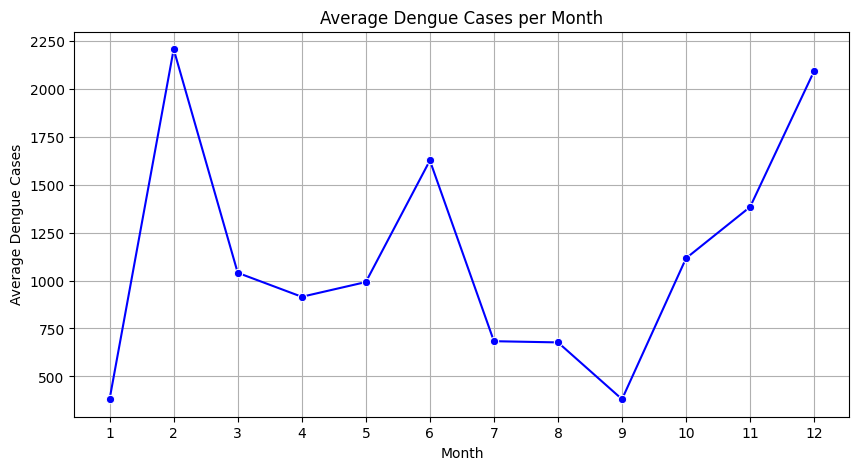

In [11]:
monthly_averages = lamok.groupby('Month')['Dengue_Cases'].mean().reset_index()
print(f"The number of dengue cases changes significantly across different months, showing a clear seasonal pattern with two distinct peaks and a pronounced trough.")

# Display data
print(monthly_averages)
plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Dengue_Cases', data=monthly_averages, marker='o', color='blue')
plt.xticks(range(1, 13))  
plt.title('Average Dengue Cases per Month')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.grid(True)
plt.show()

<h1> Insight 6: Which region has the highest number of dengue cases and deaths?</h1>

The region with the highest number of dengue cases is Region IV-A, with 163029 cases and 652 deaths.


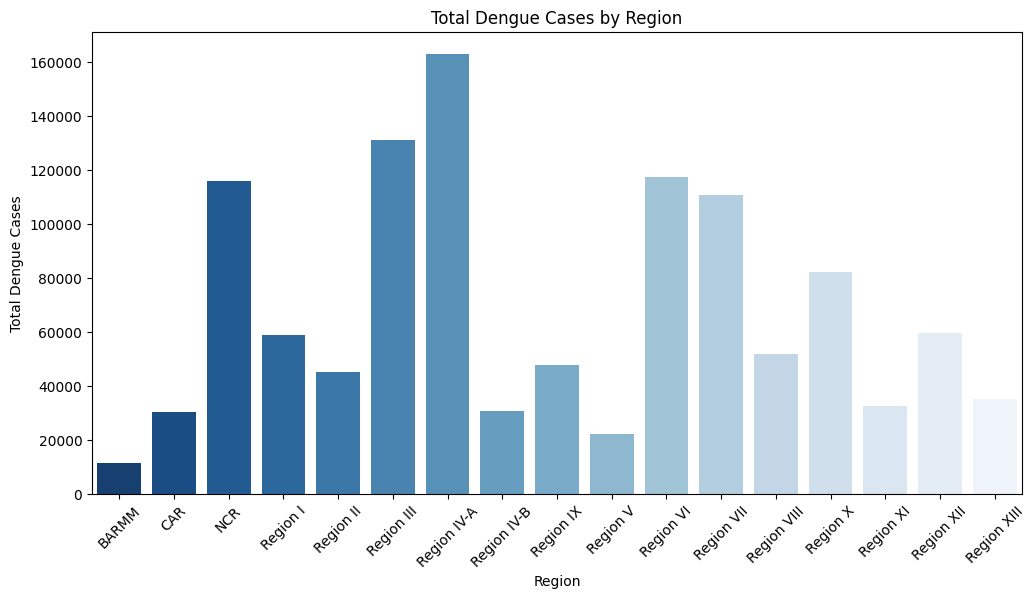

In [12]:
region_summary = lamok.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

region_summary = region_summary.sort_values(by='Dengue_Cases', ascending=False)

highest_region = region_summary.index[0]
highest_cases = region_summary.iloc[0]['Dengue_Cases']
highest_deaths = region_summary.iloc[0]['Dengue_Deaths']

print(f"The region with the highest number of dengue cases is {highest_region}, with {highest_cases} cases and {highest_deaths} deaths.")

plt.figure(figsize=(12, 6))
sns.barplot(x=region_summary.index, y=region_summary['Dengue_Cases'], palette='Blues_r')
plt.xticks(rotation=45)
plt.title('Total Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.show()

<h1>Insight 7: What is the mortality rate (%) of dengue cases per region?</h1>

Mortality rate of dengue cases per region:
- NCR: 9.41%
- Region XIII: 9.37%
- Region XII: 7.89%
- CAR: 6.97%
- BARMM: 6.57%
- Region IX: 5.02%
- Region VIII: 4.47%
- Region VI: 4.40%
- Region X: 3.93%
- Region XI: 3.82%
- Region VII: 3.32%
- Region V: 0.97%
- Region IV-A: 0.46%
- Region IV-B: 0.46%
- Region II: 0.43%
- Region I: 0.39%
- Region III: 0.33%

The region with the highest average mortality rate is NCR at 9.41%.
The region with the lowest average mortality rate is Region III at 0.33%.


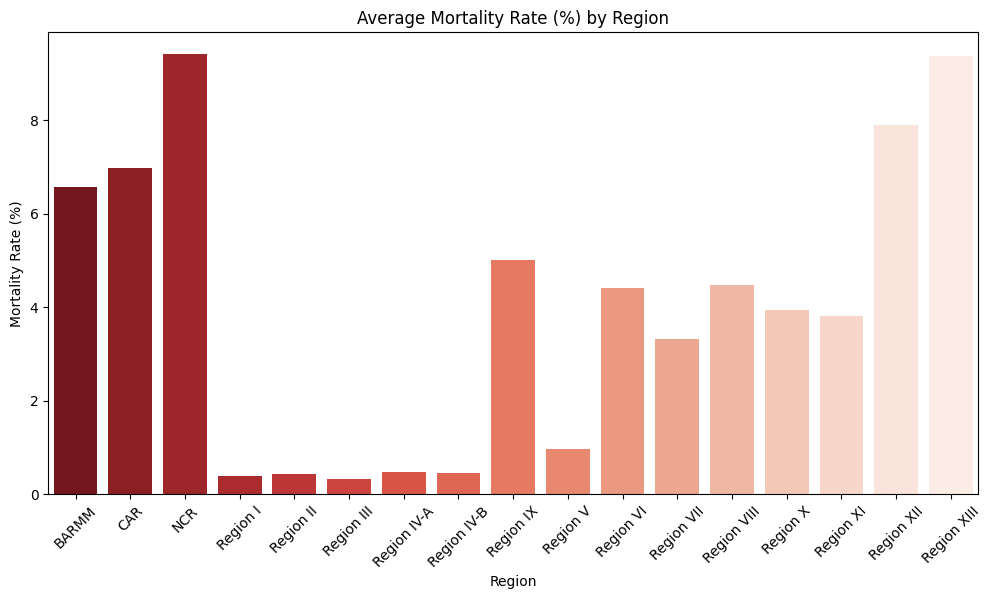

In [13]:
lamok['Mortality_Rate'] = (lamok['Dengue_Deaths'] / lamok['Dengue_Cases']) * 100

region_mortality = lamok.groupby('Region')['Mortality_Rate'].mean().sort_values(ascending=False)

print("Mortality rate of dengue cases per region:")
for region, rate in region_mortality.items():
    print(f"- {region}: {rate:.2f}%")

highest_mortality_region = region_mortality.idxmax()
highest_mortality_rate = region_mortality.max()

lowest_mortality_region = region_mortality.idxmin()
lowest_mortality_rate = region_mortality.min()

print(f"\nThe region with the highest average mortality rate is {highest_mortality_region} at {highest_mortality_rate:.2f}%.")
print(f"The region with the lowest average mortality rate is {lowest_mortality_region} at {lowest_mortality_rate:.2f}%.")

plt.figure(figsize=(12, 6))
sns.barplot(x=region_mortality.index, y=region_mortality.values, palette='Reds_r')
plt.xticks(rotation=45)
plt.title('Average Mortality Rate (%) by Region')
plt.xlabel('Region')
plt.ylabel('Mortality Rate (%)')
plt.show()

<h1> Insight 8:How are dengue cases spread across different years?</h1>

The highest spike in dengue cases happened in 2019, followed by 2018, while the lowest number of cases was recorded in 2020. The decrease in 2020 may be linked to health interventions, lockdowns, or changes in reporting trends.


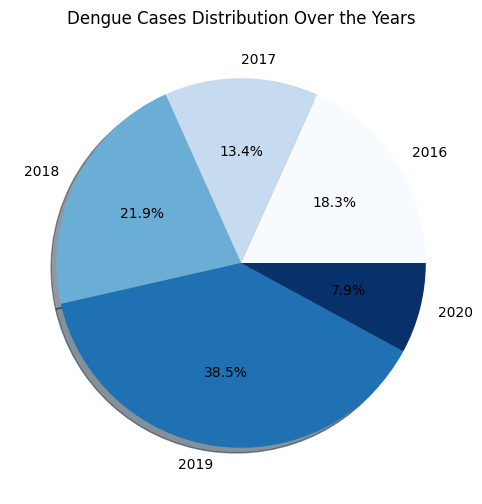

In [14]:
plt.figure(figsize=(10, 6))
cases_by_year = lamok.groupby('Year')['Dengue_Cases'].sum()
cases_by_year.plot.pie(autopct='%1.1f%%', cmap='Blues', shadow=True)
print(f"The highest spike in dengue cases happened in 2019, followed by 2018, while the lowest number of cases was recorded in 2020. The decrease in 2020 may be linked to health interventions, lockdowns, or changes in reporting trends.")
plt.title('Dengue Cases Distribution Over the Years')
plt.ylabel('')
plt.show()


<h1>Insights 9:How have dengue deaths changed from 2016 to 2020?</h1>

The highest number of dengue deaths occurred in 2016, contributing to nearly half (48.34%) of all deaths in the dataset. The mortality rate dropped significantly in 2020, likely due to improved disease management, pandemic-related restrictions, or reduced exposure risks.


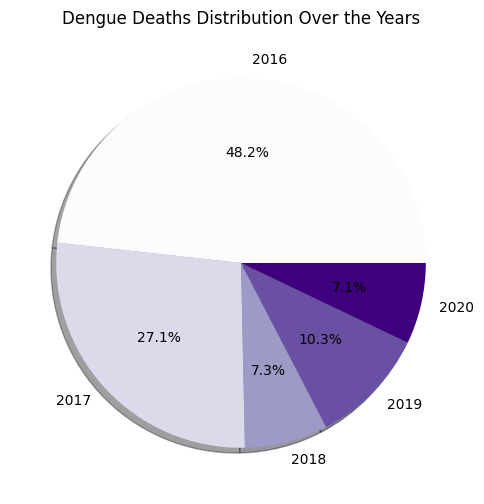

In [15]:
plt.figure(figsize=(10, 6))
deaths_by_year = lamok.groupby('Year')['Dengue_Deaths'].sum()
deaths_by_year.plot.pie(autopct='%1.1f%%', cmap='Purples', shadow=True)
print(f"The highest number of dengue deaths occurred in 2016, contributing to nearly half (48.34%) of all deaths in the dataset. The mortality rate dropped significantly in 2020, likely due to improved disease management, pandemic-related restrictions, or reduced exposure risks.")
plt.title('Dengue Deaths Distribution Over the Years')
plt.ylabel('')
plt.show()


<h1> Insight 10: What is the relationship between the magnitude of dengue outbreaks (cases) and the severity (deaths) in extreme scenarios?</h1>

 In extreme dengue outbreaks, regions with higher cases generally report higher deaths, but anomalies exist. Some regions experience unusually high cases with low deaths while others face fewer cases with high fatalities


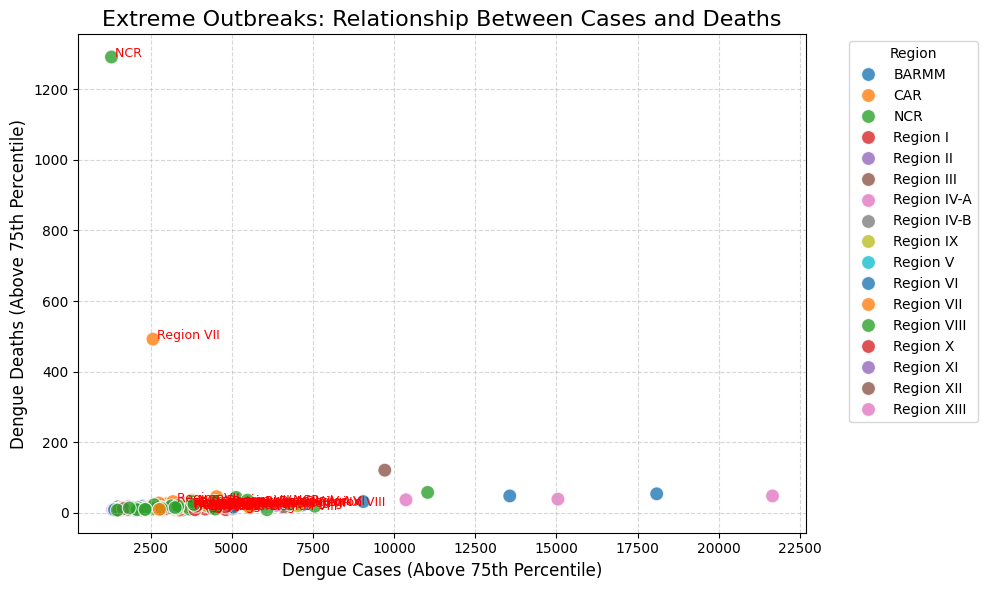

In [16]:
cases_75th = lamok['Dengue_Cases'].quantile(0.75)
deaths_75th = lamok['Dengue_Deaths'].quantile(0.75)
print(f" In extreme dengue outbreaks, regions with higher cases generally report higher deaths, but anomalies exist. Some regions experience unusually high cases with low deaths while others face fewer cases with high fatalities")

extreme_data = lamok[(lamok['Dengue_Cases'] > cases_75th) & (lamok['Dengue_Deaths'] > deaths_75th)]

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=extreme_data,
    x='Dengue_Cases',
    y='Dengue_Deaths',
    hue='Region',
    palette='tab10',
    s=100,  
    alpha=0.8  
)
anomalies = extreme_data[
    ((extreme_data['Dengue_Cases'] > extreme_data['Dengue_Cases'].mean()) & 
     (extreme_data['Dengue_Deaths'] < extreme_data['Dengue_Deaths'].mean())) |
    ((extreme_data['Dengue_Cases'] < extreme_data['Dengue_Cases'].mean()) & 
     (extreme_data['Dengue_Deaths'] > extreme_data['Dengue_Deaths'].mean()))
]
for _, row in anomalies.iterrows():
    plt.text(row['Dengue_Cases'], row['Dengue_Deaths'], f" {row['Region']}", fontsize=9, color='red')

plt.title('Extreme Outbreaks: Relationship Between Cases and Deaths', fontsize=16)
plt.xlabel('Dengue Cases (Above 75th Percentile)', fontsize=12)
plt.ylabel('Dengue Deaths (Above 75th Percentile)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<h1>Insights 11: How do extreme events (e.g., maximum cases or deaths) compare across years and regions?</h1>

Dengue outbreaks peak in cycles, with severe years (2019–2018) showing extreme cases and deaths across different regions. Some areas consistently face high mortality, indicating disparities in healthcare response. The drop in cases and deaths in 2020 suggests that external factors significantly impacted dengue transmission. 


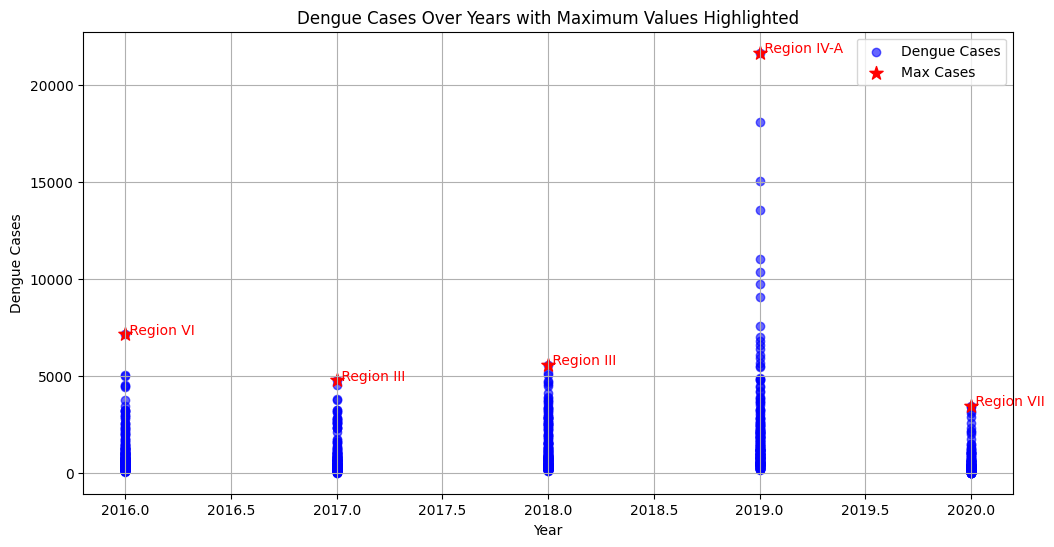

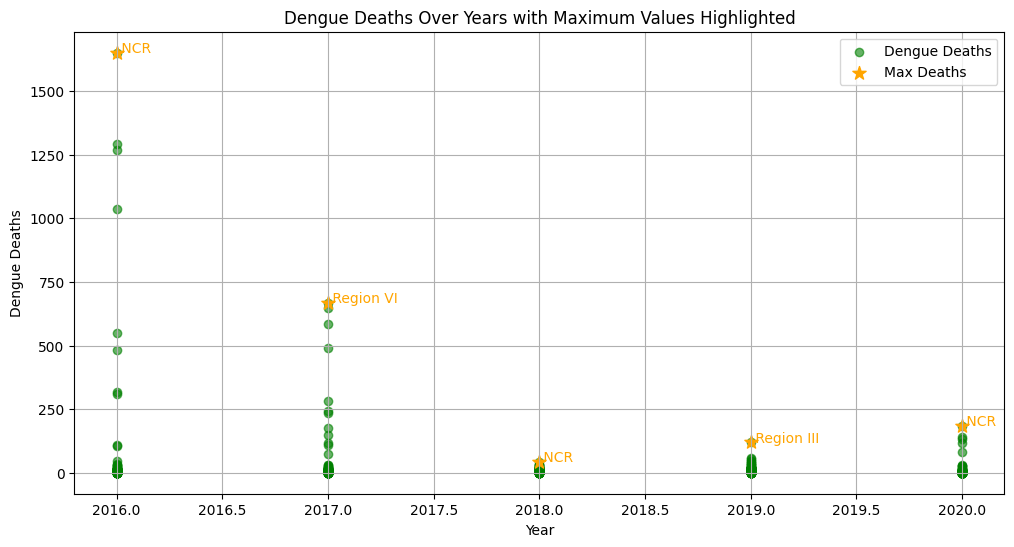

In [17]:
max_cases_per_year = lamok.loc[lamok.groupby('Year')['Dengue_Cases'].idxmax()]
max_deaths_per_year = lamok.loc[lamok.groupby('Year')['Dengue_Deaths'].idxmax()]
print(f"Dengue outbreaks peak in cycles, with severe years (2019–2018) showing extreme cases and deaths across different regions. Some areas consistently face high mortality, indicating disparities in healthcare response. The drop in cases and deaths in 2020 suggests that external factors significantly impacted dengue transmission. ")

plt.figure(figsize=(12, 6))
plt.scatter(lamok['Year'], lamok['Dengue_Cases'], color='blue', label='Dengue Cases', alpha=0.6)

plt.scatter(max_cases_per_year['Year'], max_cases_per_year['Dengue_Cases'], 
            color='red', s=100, label='Max Cases', marker='*')

for _, row in max_cases_per_year.iterrows():
    plt.text(row['Year'], row['Dengue_Cases'], f" {row['Region']}", fontsize=10, color='red')

plt.title('Dengue Cases Over Years with Maximum Values Highlighted')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))

plt.scatter(lamok['Year'], lamok['Dengue_Deaths'], color='green', label='Dengue Deaths', alpha=0.6)
plt.scatter(max_deaths_per_year['Year'], max_deaths_per_year['Dengue_Deaths'], 
            color='orange', s=100, label='Max Deaths', marker='*')

for _, row in max_deaths_per_year.iterrows():
    plt.text(row['Year'], row['Dengue_Deaths'], f" {row['Region']}", fontsize=10, color='orange')

plt.title('Dengue Deaths Over Years with Maximum Values Highlighted')
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.legend()
plt.grid(True)
plt.show()

<h1> Insights 12:Comparing the trends of dengue cases and deaths in the NCR (National Capital Region) to the national average, are there significant differences? </h1>

NCR experiences significantly higher dengue cases than the national average, particularly during peak outbreak years (2018–2019). However, despite high case counts, its mortality rate remains lower than the national trend, likely due to better healthcare services and early intervention. 


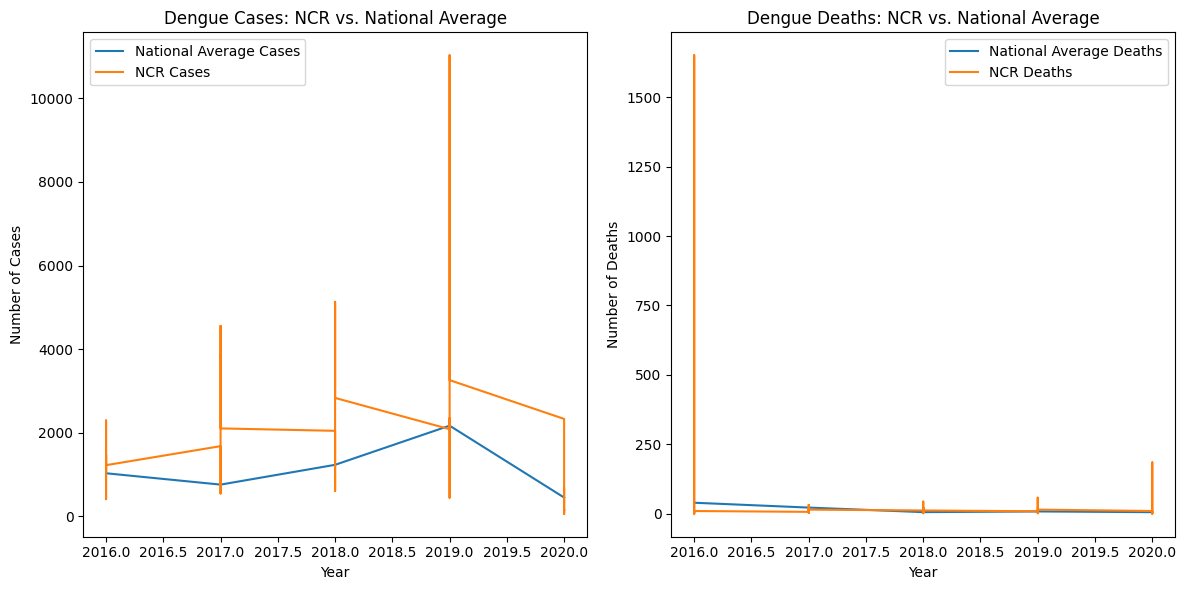

In [18]:
national_avg_cases = lamok.groupby('Year')['Dengue_Cases'].mean()
national_avg_deaths = lamok.groupby('Year')['Dengue_Deaths'].mean()
ncr_data = lamok[lamok['Region'] == 'NCR']
print("NCR experiences significantly higher dengue cases than the national average, particularly during peak outbreak years (2018–2019). However, despite high case counts, its mortality rate remains lower than the national trend, likely due to better healthcare services and early intervention. ")

plt.figure(figsize=(12, 6))  
plt.subplot(1, 2, 1)
plt.plot(national_avg_cases.index, national_avg_cases.values, label='National Average Cases')
plt.plot(ncr_data['Year'], ncr_data['Dengue_Cases'], label='NCR Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Dengue Cases: NCR vs. National Average')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(national_avg_deaths.index, national_avg_deaths.values, label='National Average Deaths')
plt.plot(ncr_data['Year'], ncr_data['Dengue_Deaths'], label='NCR Deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Dengue Deaths: NCR vs. National Average')
plt.legend()

plt.tight_layout() 
plt.show()

In [19]:
 lamok['Year'] = pd.to_numeric(lamok['Year'])

<h1>Insights 13: What proportion of dengue cases resulted in death each year?</h1>

 The proportion of dengue cases resulting in death varies across years. While 2019 had the most cases, its fatality rate was not the highest, suggesting improved outbreak response. However, certain years experienced higher CFRs despite fewer cases, indicating that healthcare challenges and outbreak severity can impact mortality.


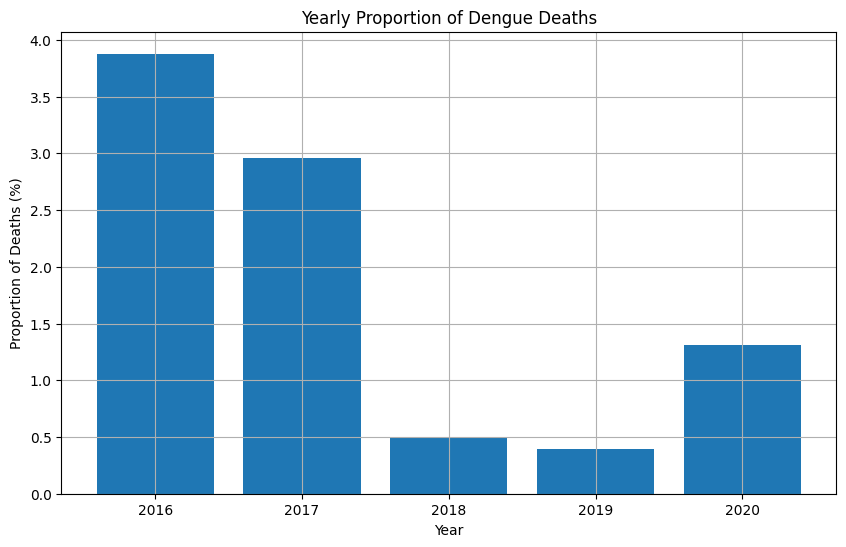

In [20]:
yearly_data = lamok.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
yearly_data['Death_Proportion'] = np.where(yearly_data['Dengue_Cases'] != 0, (yearly_data['Dengue_Deaths'] / yearly_data['Dengue_Cases']) * 100, 0)  
print(' The proportion of dengue cases resulting in death varies across years. While 2019 had the most cases, its fatality rate was not the highest, suggesting improved outbreak response. However, certain years experienced higher CFRs despite fewer cases, indicating that healthcare challenges and outbreak severity can impact mortality.')
# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['Death_Proportion'])
plt.xlabel('Year')
plt.ylabel('Proportion of Deaths (%)')
plt.title('Yearly Proportion of Dengue Deaths')
plt.grid(True)
plt.show()

<h1> Insight 14: Comparing the number of cases and deaths in each region for a specific year (e.g., 2019).</h1>

Dengue cases and deaths vary significantly across regions in 2016.
Some areas consistently face severe outbreaks, while others experience fluctuating trends.
Notably, regions with high cases do not always have high deaths.


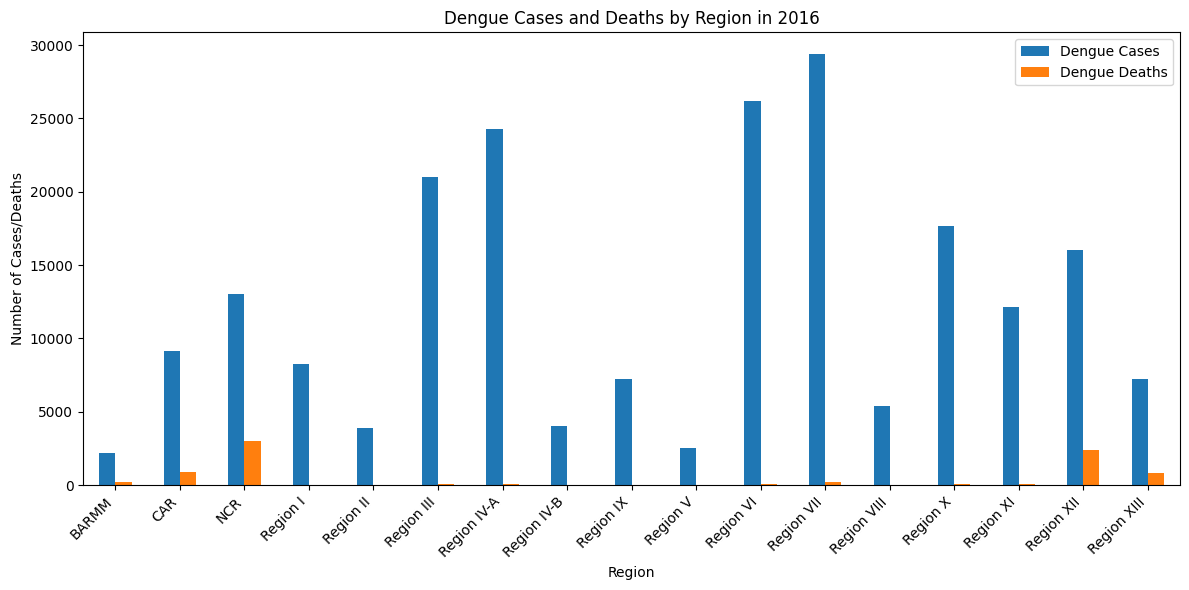

Dengue cases and deaths vary significantly across regions in 2017.
Some areas consistently face severe outbreaks, while others experience fluctuating trends.
Notably, regions with high cases do not always have high deaths.


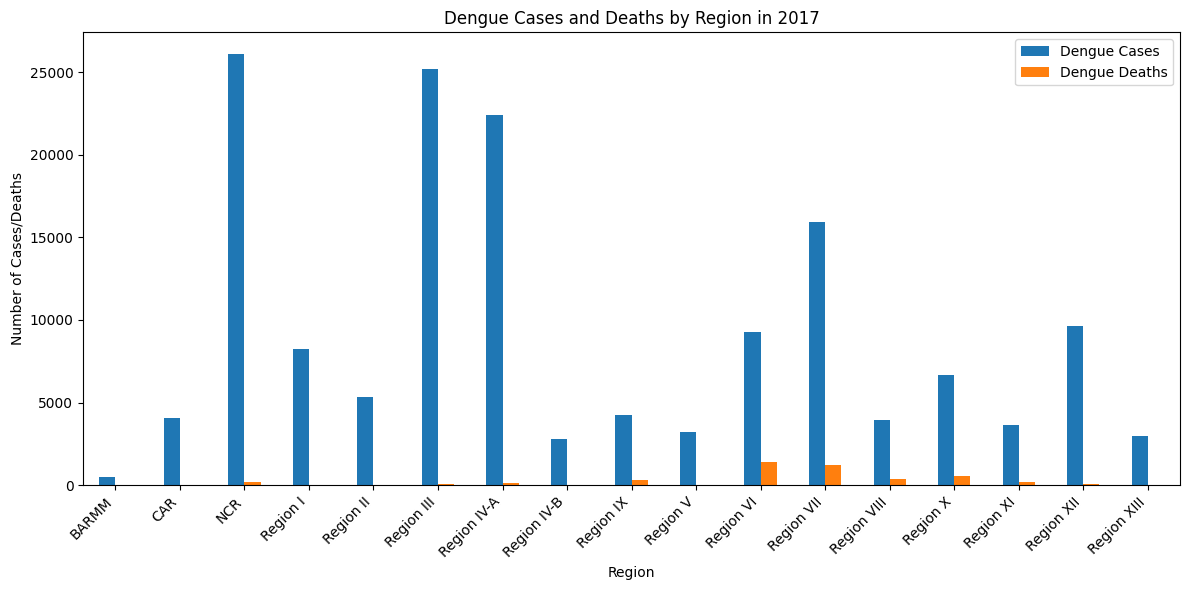

Dengue cases and deaths vary significantly across regions in 2018.
Some areas consistently face severe outbreaks, while others experience fluctuating trends.
Notably, regions with high cases do not always have high deaths.


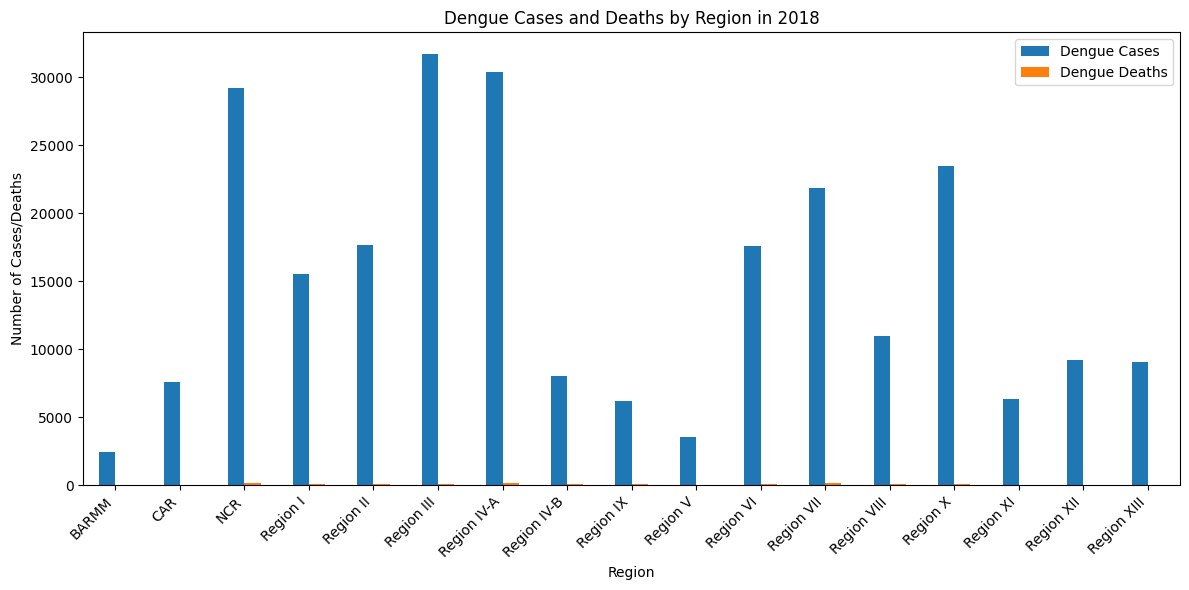

Dengue cases and deaths vary significantly across regions in 2019.
Some areas consistently face severe outbreaks, while others experience fluctuating trends.
Notably, regions with high cases do not always have high deaths.


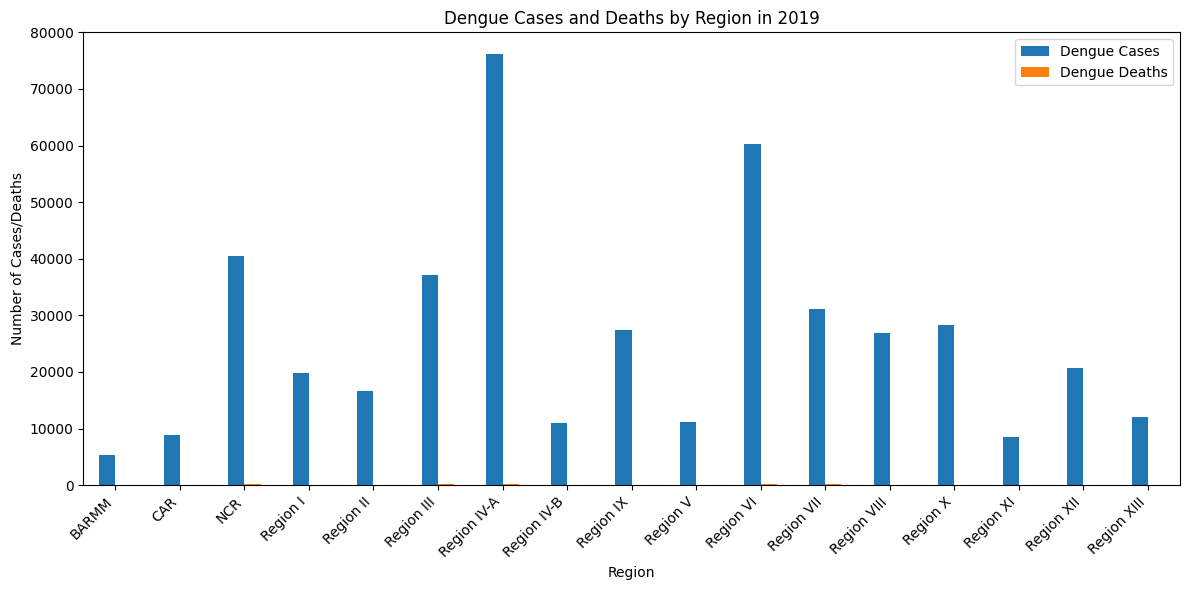

Dengue cases and deaths vary significantly across regions in 2020.
Some areas consistently face severe outbreaks, while others experience fluctuating trends.
Notably, regions with high cases do not always have high deaths.


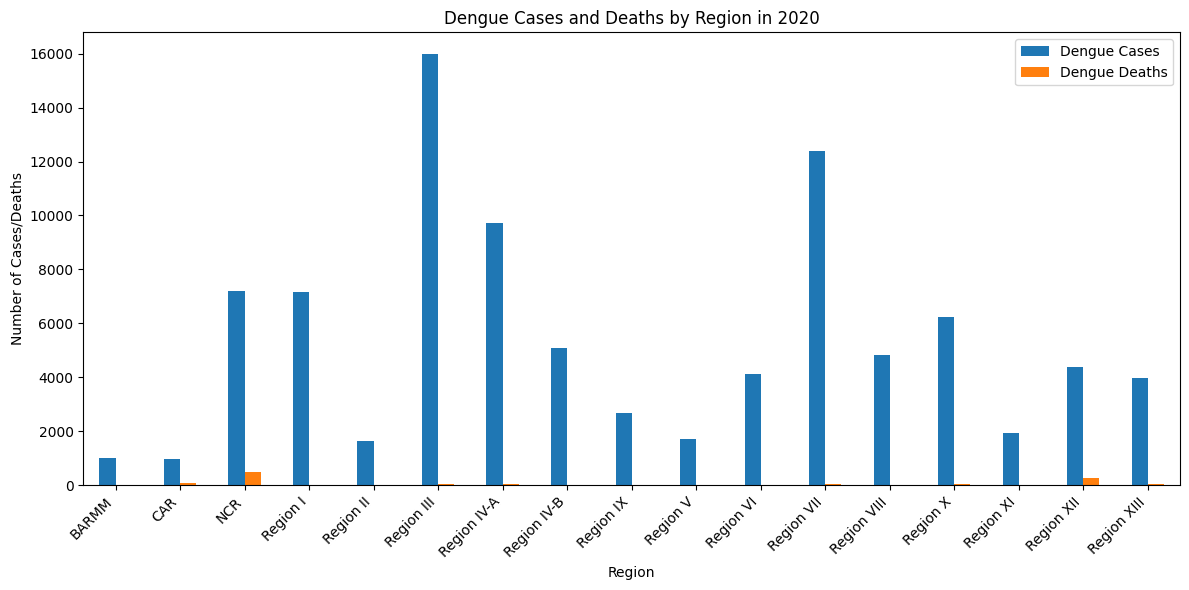

In [21]:
def plot_cases_deaths_by_region(year, lamok):
    year_data = lamok[lamok['Year'] == year]
    regional_data = year_data.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
    
    print(f'Dengue cases and deaths vary significantly across regions in {year}.')
    print('Some areas consistently face severe outbreaks, while others experience fluctuating trends.')
    print('Notably, regions with high cases do not always have high deaths.')
    
    regional_data.plot(kind='bar', figsize=(12, 6))
    plt.xlabel('Region')
    plt.ylabel('Number of Cases/Deaths')
    plt.title(f'Dengue Cases and Deaths by Region in {year}')
    plt.xticks(rotation=45, ha='right') 
    plt.legend(['Dengue Cases', 'Dengue Deaths'])
    plt.tight_layout()
    plt.show()

for year in range(2016, 2021):
    plot_cases_deaths_by_region(year, lamok)

<h1> Insight 15: How do dengue cases distribute across months in a given year in Region NCR?</h1>

Dengue cases in NCR for the selected year (2019) show a seasonal pattern, with cases peaking in the rainy months (June–September) and declining during the dry months (December–February). This suggests that dengue transmission is influenced by weather conditions, with higher cases during periods of increased mosquito breeding.


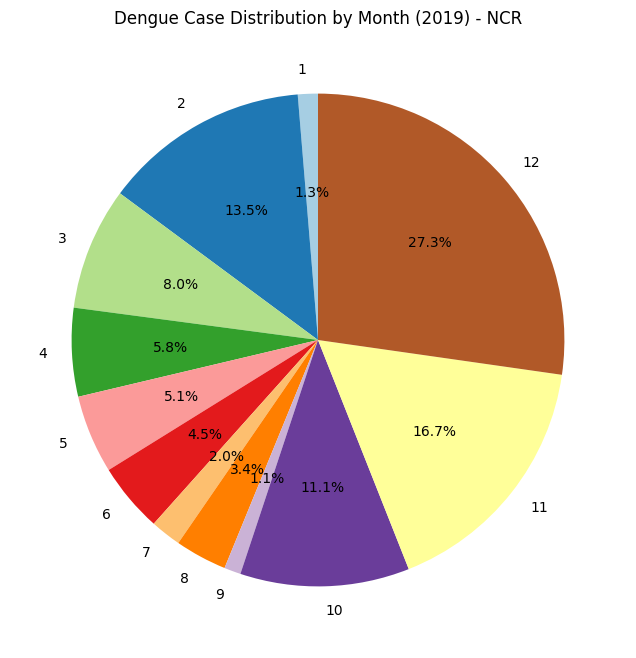

In [22]:
selected_year = 2019
ncr_data = lamok[(lamok['Year'] == selected_year) & (lamok['Region'] == "NCR")]
print('Dengue cases in NCR for the selected year (2019) show a seasonal pattern, with cases peaking in the rainy months (June–September) and declining during the dry months (December–February). This suggests that dengue transmission is influenced by weather conditions, with higher cases during periods of increased mosquito breeding.')

monthly_data = ncr_data.groupby('Month')['Dengue_Cases'].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    monthly_data, 
    labels=monthly_data.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)

plt.title(f'Dengue Case Distribution by Month ({selected_year}) - NCR')
plt.show()

<h1> Insight 16: How has the proportion of dengue cases shifted across years when considering the total number of cases in each year?</h1>

The dengue case distribution shifted dramatically, with 2019 accounting for an overwhelmingly high proportion of cases compared to previous years.


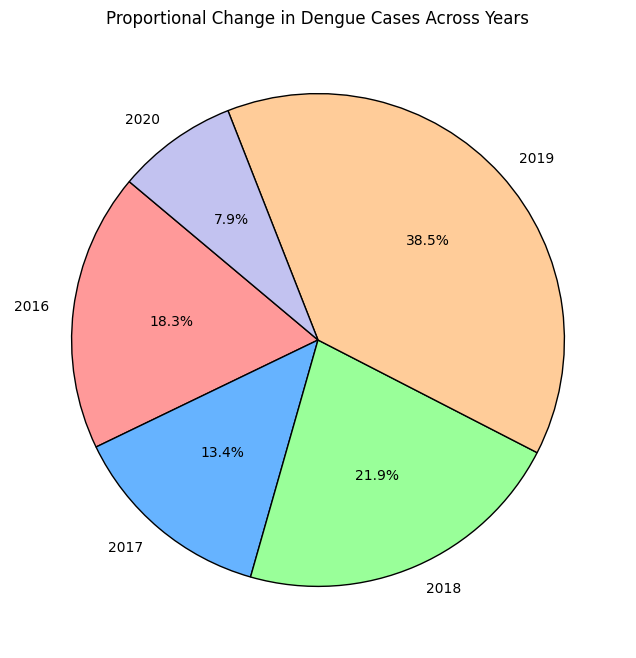

In [23]:
yearly_cases = lamok.groupby('Year')['Dengue_Cases'].sum()
print("The dengue case distribution shifted dramatically, with 2019 accounting for an overwhelmingly high proportion of cases compared to previous years.")

plt.figure(figsize=(8, 8))
plt.pie(
    yearly_cases, 
    labels=yearly_cases.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Proportional Change in Dengue Cases Across Years")
plt.show()

<h1> Insights 17: What are the Top 5 regions with the Highest dengue cases in the year 2019?</h1>

Top 5 Regions with Highest Dengue Cases in 2019:Region
Region IV-A    76195
Region VI      60357
NCR            40478
Region III     37158
Region VII     31053
Name: Dengue_Cases, dtype: int64


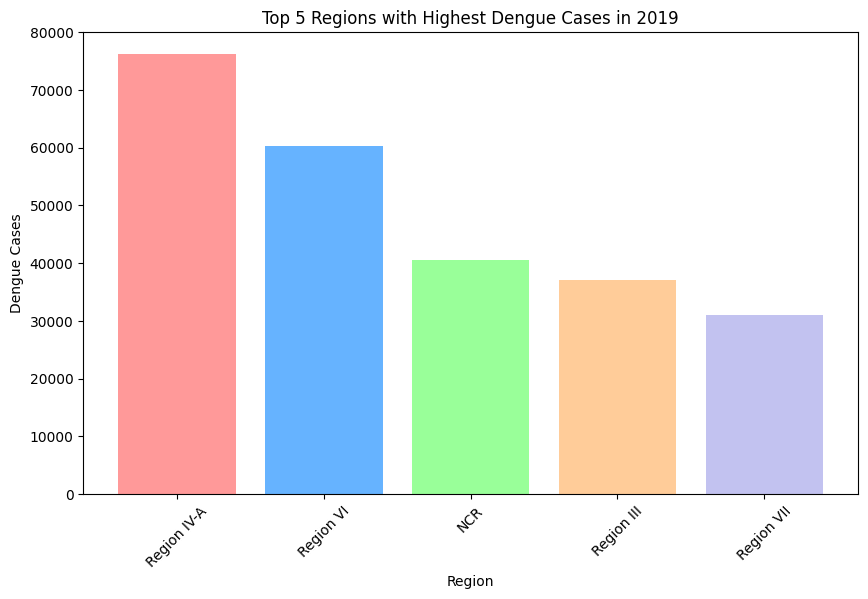

In [24]:
df_2019 = lamok[lamok['Year'] == 2019]
top_regions = df_2019.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head(5)
print(f"Top 5 Regions with Highest Dengue Cases in 2019:{top_regions}")

plt.figure(figsize=(10, 6))
plt.bar(top_regions.index, top_regions.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.title("Top 5 Regions with Highest Dengue Cases in 2019")
plt.xticks(rotation=45) 
plt.show()

<h1> Insight 18: What are the Top 5 regions with the Least dengue cases in the year 2019?</h1>


Top 5 Regions with Lowest Dengue Cases in 2019:Region
BARMM           5393
Region XI       8466
CAR             8808
Region IV-B    10984
Region V       11141
Name: Dengue_Cases, dtype: int64


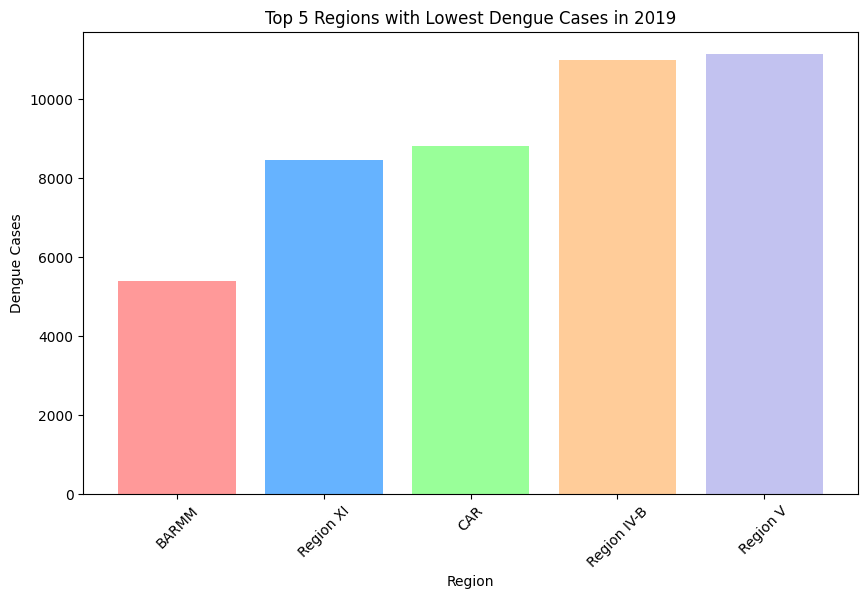

In [25]:
df_2019 = lamok[lamok['Year'] == 2019]
least_regions = df_2019.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=True).head(5)
print(f"Top 5 Regions with Lowest Dengue Cases in 2019:{least_regions}")

plt.figure(figsize=(10, 6))
plt.bar(least_regions.index, least_regions.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.xlabel("Region")
plt.ylabel("Dengue Cases")
plt.title("Top 5 Regions with Lowest Dengue Cases in 2019")
plt.xticks(rotation=45)  
plt.show()

<h1> Insight 19: Comparison of top 5 regions with Highest dengue cases and deaths. </h1>

Top 5 Regions with Highest Dengue Cases and Their Deaths in 2019:
             Dengue_Cases  Dengue_Deaths
Region                                  
Region IV-A         76195            242
Region VI           60357            233
NCR                 40478            190
Region III          37158            194
Region VII          31053            143


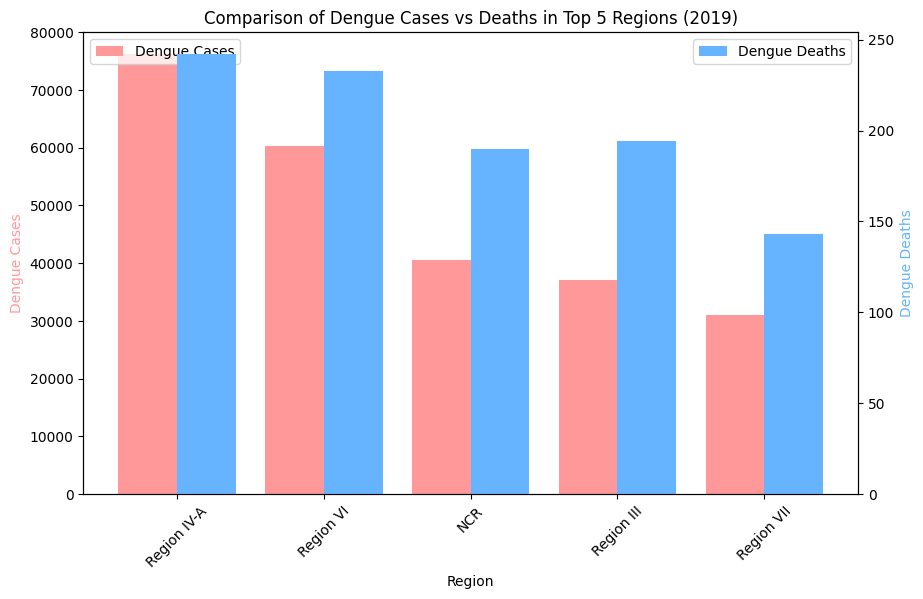

In [26]:
top_regions = df_2019.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
top_5_cases = top_regions.sort_values(by='Dengue_Cases', ascending=False).head(5)
print("Top 5 Regions with Highest Dengue Cases and Their Deaths in 2019:")
print(top_5_cases)

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_width = 0.4
indices = np.arange(len(top_5_cases))

ax1.bar(indices, top_5_cases['Dengue_Cases'], width=bar_width, label='Dengue Cases', color='#ff9999')
ax2 = ax1.twinx()
ax2.bar(indices + bar_width, top_5_cases['Dengue_Deaths'], width=bar_width, label='Dengue Deaths', color='#66b3ff')
ax1.set_xlabel("Region")
ax1.set_ylabel("Dengue Cases", color='#ff9999')
ax2.set_ylabel("Dengue Deaths", color='#66b3ff')
ax1.set_title("Comparison of Dengue Cases vs Deaths in Top 5 Regions (2019)")
ax1.set_xticks(indices + bar_width / 2)
ax1.set_xticklabels(top_5_cases.index, rotation=45)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

<h1> Insight 20: Are there "hotspots" where Dengue outbreaks frequently occur??</h1>

In [31]:
region_coordinates = {
    "BARMM": [7.2043, 124.2400],
    "CAR": [17.3669, 121.2333],
    "NCR": [14.5995, 120.9842],
    "Region I": [16.0431, 120.3333],
    "Region II": [17.7500, 121.5000],
    "Region III": [15.4828, 120.7120],
    "Region IV-A": [14.1000, 121.2000],
    "Region IV-B": [10.0000, 119.7500],
    "Region V": [13.5000, 123.3333],
    "Region VI": [11.0000, 122.5000],
    "Region VII": [10.5000, 123.5000],
    "Region VIII": [11.0000, 125.0000],
    "Region IX": [7.8333, 122.5000],
    "Region X": [8.2500, 124.5000],
    "Region XI": [7.0833, 125.6000],
    "Region XII": [6.7500, 124.7500],
    "Region XIII": [9.0000, 125.5000]
}
lamok["Latitude"] = lamok["Region"].map(lambda x: region_coordinates.get(x, [None, None])[0])
lamok["Longitude"] = lamok["Region"].map(lambda x: region_coordinates.get(x, [None, None])[1])
print("Yes, there are hotspots where Dengue outbreaks frequently occur. The heatmap shows that some regions have consistently higher Dengue cases compared to others.")
print(lamok[["Region", "Latitude", "Longitude"]].head())

map_center = [12.8797, 121.7740] 
dengue_map = folium.Map(location=map_center, zoom_start=6)
\
heat_data = list(zip(lamok["Latitude"], lamok["Longitude"], lamok["Dengue_Cases"]))
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(dengue_map)
dengue_map

Yes, there are hotspots where Dengue outbreaks frequently occur. The heatmap shows that some regions have consistently higher Dengue cases compared to others.
     Region  Latitude  Longitude
0  Region I   16.0431   120.3333
1  Region I   16.0431   120.3333
2  Region I   16.0431   120.3333
3  Region I   16.0431   120.3333
4  Region I   16.0431   120.3333
